In [1]:
# import the libraries
import cv2
import numpy as np
import pylab
from cudamodules import StereoMatchingBasic, StereoMatchingSlow
from tools import PlotTools

First we need to load test images

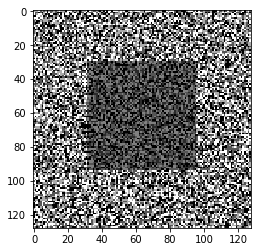

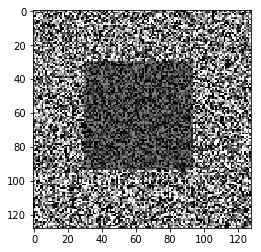

In [2]:
img1 = cv2.imread('Data/leftTest.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('Data/rightTest.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
PlotTools.display_img(img1)
PlotTools.display_img(img2)

CSS
===

the below images shows the matching with the CSS score function.

Question 1
----------

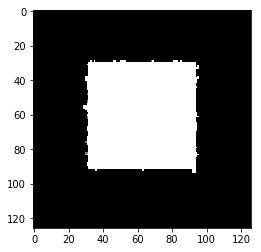

In [3]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img1, img2, 3, dmin=0, dmax=2), "PS2-1-a-1")

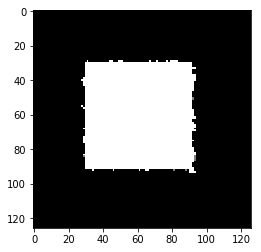

In [4]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img2, img1, 3, dmin=-2, dmax=0), "PS2-1-a-2")

Question 2
------------

In [5]:
img1b = cv2.imread('Data/proj2-pair1-L.png')
img1b = cv2.cvtColor(img1b, cv2.COLOR_BGR2GRAY)
img2b = cv2.imread('Data/proj2-pair1-R.png')
img2b = cv2.cvtColor(img2b, cv2.COLOR_BGR2GRAY)

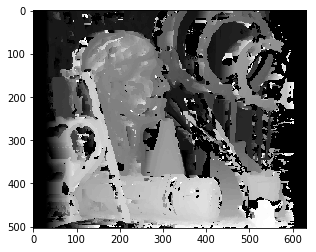

In [6]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img1b, img2b, 9, dmin=30, dmax=100), "PS2-2-a-1")

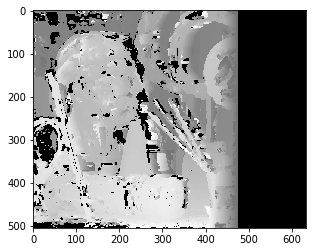

In [7]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img2b, img1b, 7, dmin=-100, dmax=-30), "PS2-2-a-2")

As we can see the images are quite similar to ground results, but it have much noise on it. All the white/black parts corresponds to points that does not have significant matching score withing the given disparity range.

Also we can note that the point at the left/right of the image cannot be matched as there is no such equivalent on the other image.

Question 3
----------

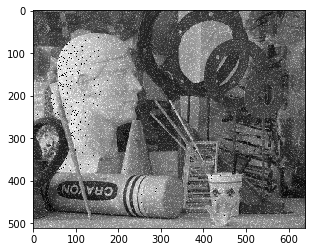

In [8]:
noise = np.empty_like(img2b)
cv2.randn(noise, 0, 30)
img2b_noised = img2b + noise
pylab.imshow(img2b_noised)

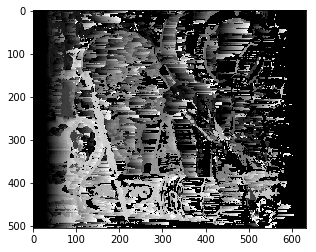

In [9]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img1b, img2b_noised, 7, dmin=30, dmax=100), "PS2-3-a-1")

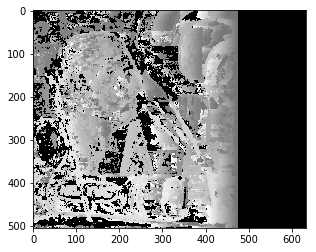

In [10]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img2b_noised, img1b, 7, dmin=-100, dmax=-30), "PS2-3-a-2")

Without any surprise adding noise to inputs, make the algorithm less efficient. We can also note that the flat surfaces a more affected than edge. Also finding an noisy window into a normal image seems to lead to better results than finding a "regular" window into a noisy image. (This is not trivial as this operation is supposed to be commutative) This may due to some algorithmic specificities (especially when finding the minima of the disparities scores).

question 3.b

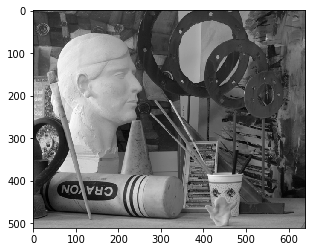

In [11]:
img2b_contrast = img2b * 1.1
pylab.imshow(img2b_contrast)

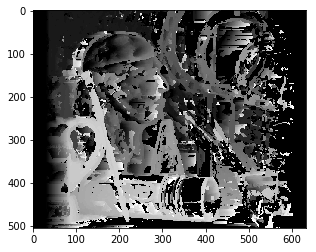

In [12]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img1b, img2b_contrast, 7, dmin=30, dmax=100), "PS2-3-b-1")

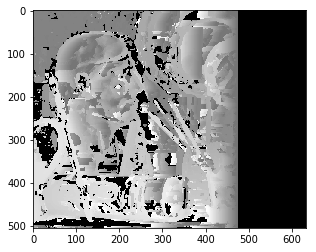

In [13]:
PlotTools.display_and_save(StereoMatchingBasic.stereo_matching_basic(img2b_contrast, img1b, 7, dmin=-100, dmax=-30), "PS2-3-b-2")

As seen on the previous images leads to poor results, especially on flat surfaces. Anyway the edges seems to have better matching in this case.

Normalized Cross Correlation
============================

the above images shows the matches with the cross correlation score function.

here is the kernel used to compute the cross correlation, note that the computation has been splitted in two steps (computation of *sa* and *sb* and then computation of *d*). This was done to avoid enventual overflowing on big windows sizes.
________________________________________________________
EDIT:

For some obscure reason, this code wont work, i decided to switch to a fully-python algorithm that can use the cv2 function for this

In [14]:
kernel = StereoMatchingBasic.KERNEL_CROSS_CORR
print(kernel)


register float best;

__shared__ float scores[resdx];
__syncthreads();

int64_t aij;
int64_t bij;
int64_t sa = 0;
int64_t sb = 0;
float d = 0.0;
float div = 0.0;
// split the computation in two steps to avoid overflow
for( i=-wdiam; i<=wdiam; i++){
    for( j=-wdiam; j<=wdiam; j++){
        aij = a[(ay+i)+((ax+j)*imy)];
        bij = b[(bx+i)+((ax+j)*imy)];
        sa = sa + (aij*aij);
        sb = sb + (bij*bij);
    }
}
div = sqrtf((float)sa)*sqrtf((float)sb);
for( i=-wdiam; i<=wdiam; i++){
    for( j=-wdiam; j<=wdiam; j++){
        aij = a[(ay+i)+((ax+j)*imy)];
        bij = b[(bx+i)+((ax+j)*imy)];
        d  = d  + ((aij*bij) / div);
    }
}
scores[tix] =  d;



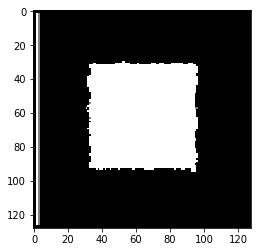

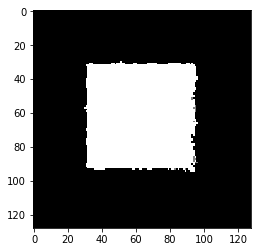

In [6]:
PlotTools.display_img(StereoMatchingSlow.cross_corr_match(img1, img2, 5, -2, 0))
PlotTools.display_img(StereoMatchingSlow.cross_corr_match(img2, img1, 5, 0, 2))

In [16]:
PlotTools.display_and_save(StereoMatchingSlow.cross_corr_match(
    img1b,
    img2b,
    5, -100, -30),
    "PS2-4-a-1"
)

error: /io/opencv/modules/imgproc/src/templmatch.cpp:589: error: (-215) corrsize.height <= img.rows + templ.rows - 1 && corrsize.width <= img.cols + templ.cols - 1 in function crossCorr


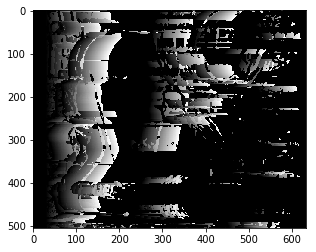

In [17]:

PlotTools.display_img(StereoMatchingBasic.stereo_matching_basic(
    cv2.cvtColor(cv2.imread("Data/proj2-pair1-L.png"), cv2.COLOR_BGR2GRAY),
    cv2.cvtColor(cv2.imread("Data/proj2-pair1-R.png"), cv2.COLOR_BGR2GRAY),
    7, kernel))
